# HotS Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and merge data and clean

In [2]:
scores_df = pd.read_csv('~/ML_class/hots_project/scores (2).csv')
char_df = pd.read_csv('~/ML_class/hots_project/chars (2).csv')
mapping = pd.read_csv('~/ML_class/hots_project/FattySips 02 SL-85027-05-Mapping - FattySips 02 SL-85027-05-Mapping.csv')
mapping = mapping[1:91]

In [3]:
# Change ID columns to str
scores_df = scores_df.astype({'ReplayID': str, 'PlayerID': str})
char_df = char_df.astype({'replayid': str, 'playerid': str})

# Merge the columns into a key column
scores_df['key'] = scores_df[['ReplayID', 'PlayerID']].agg('-'.join, axis=1)
char_df['key'] = char_df[['replayid', 'playerid']].agg('-'.join, axis=1)

# Drop the old columns
scores_df = scores_df.drop(columns=['ReplayID', 'PlayerID'])
char_df = char_df.drop(columns=['replayid', 'playerid'])

mapping = mapping.drop(columns=['Type', 'PrimaryName'])
mapping = mapping.rename(columns={'identifierid':'characterid', 'NewGroup':'class'})

In [4]:
# Merge the two dataframes
data_df = scores_df.join(char_df.set_index('key'), on='key')

In [5]:
rename = {'ReplayID': 'match_id', 'PlayerID': 'p_id', 'level': 'final_team_level', 'Takedowns': 'takedowns', 'SoloKills': 'kills', 
          'Assists': 'assists', 'Deaths':'deaths', 'HighestKillStreak':'highest_kill_streak', 'HeroDamage':'player_dmg_dealt', 'SiegeDamage': 'siege_dmg_dealt',
          'StructureDamage': 'structure_dmg_dealt', 'MinionDamage': 'minion_dmg_dealt', 'CreepDamage': 'creep_dmg', 'SummonDamage': 'summon_dmg_dealt', 'TimeCCdEnemyHeroes': 'cc_time',
          'Healing': 'healing', 'SelfHealing': 'self_healing', 'DamageTaken': 'dmg_taken', 'ExperienceContribution': 'exp_gained', 'TownKills': 'town_kill',
          'TimeSpentDead': 'time_dead', 'MercCampCaptures': 'mercenary_camps_captured', 'WatchTowerCaptures': 'watchtower_capture', 'MetaExperience': 'meta_exp'}

data_df = data_df.rename(columns=rename)


In [6]:
"""
Droped columns:
match_id: identifier
p_id: identifier
cc_time: All null values
structure_dmg_dealt: part of siege_dmg
minion_dmg_dealt: part of siege_dmg
summon_dmg_dealt: part of siege_dmg
meta_exp: total exp gained by the team
takedowns: kills and assists combineed
"""

data = data_df.drop(columns=['characterlevel', 'takedowns', 'structure_dmg_dealt', 'minion_dmg_dealt', 'summon_dmg_dealt', 'cc_time', 'meta_exp', 'key', 'replaybuild', 'gamemode', 'timestampreplay', 'isautoselect'])
data['dmg_taken'] = data['dmg_taken'].replace(np.nan, 0)
data['healing'] = data['healing'].replace(np.nan, 0)
data['time_dead'] = pd.to_timedelta(data['time_dead']).dt.total_seconds().astype('float32')
data['replaylength'] = pd.to_timedelta(data['replaylength']).dt.total_seconds().astype('float32')

In [7]:
data.describe()

,Level,kills,assists,deaths,highest_kill_streak,player_dmg_dealt,siege_dmg_dealt,creep_dmg,healing,self_healing,dmg_taken,exp_gained,town_kill,time_dead,mercenary_camps_captured,watchtower_capture,mapid,replaylength,characterid,iswinner
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,20.195333,3.14000,9.052233,3.191467,7.841533,42894.236400,66879.398967,16848.534633,14874.271133,12751.077333,51004.013333,10941.849300,1.352633,121.044998,3.098133,1.043833,1009.041333,1155.314697,40.115200,0.500000
std,2.976935,2.75885,5.456870,2.189498,5.252816,24084.869942,46360.632928,16962.555799,32036.694665,14426.260942,29922.217140,5323.852061,1.327281,91.847931,2.605992,2.499424,5.576319,264.462708,26.195575,0.500008
min,7.000000,0.00000,0.000000,0.000000,0.000000,104.000000,727.000000,0.000000,0.000000,0.000000,0.000000,252.000000,0.000000,0.000000,0.000000,0.000000,1001.000000,391.000000,1.000000,0.000000
25%,18.000000,1.00000,5.000000,1.000000,4.000000,25035.750000,32178.000000,5012.000000,0.000000,0.000000,29735.250000,7161.000000,0.000000,50.000000,1.000000,0.000000,1004.000000,969.750000,18.000000,0.000000
50%,20.000000,2.00000,9.000000,3.000000,7.000000,38418.000000,56937.000000,11682.000000,0.000000,8524.000000,43914.500000,10030.500000,1.000000,109.000000,3.000000,0.000000,1008.000000,1126.000000,37.000000,0.500000
75%,22.000000,5.00000,13.000000,5.000000,11.000000,55581.250000,90240.500000,23254.750000,0.000000,20136.500000,65710.250000,13700.500000,2.000000,176.000000,4.000000,1.000000,1013.000000,1307.000000,61.000000,1.000000
max,29.000000,23.00000,35.000000,15.000000,38.000000,226307.000000,482110.000000,194579.000000,324029.000000,145620.000000,278865.000000,57958.000000,13.000000,694.000000,24.000000,28.000000,1022.000000,2451.000000,90.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Level                     30000 non-null  int64  
 1   kills                     30000 non-null  int64  
 2   assists                   30000 non-null  int64  
 3   deaths                    30000 non-null  int64  
 4   highest_kill_streak       30000 non-null  int64  
 5   player_dmg_dealt          30000 non-null  int64  
 6   siege_dmg_dealt           30000 non-null  int64  
 7   creep_dmg                 30000 non-null  int64  
 8   healing                   30000 non-null  float64
 9   self_healing              30000 non-null  int64  
 10  dmg_taken                 30000 non-null  float64
 11  exp_gained                30000 non-null  int64  
 12  town_kill                 30000 non-null  int64  
 13  time_dead                 30000 non-null  float32
 14  mercen

In [9]:
num = ['Level', 'kills', 'assists', 'deaths', 'highest_kill_streak',
       'player_dmg_dealt', 'siege_dmg_dealt', 'creep_dmg', 'healing',
       'self_healing', 'dmg_taken', 'exp_gained', 'town_kill', 'time_dead',
       'mercenary_camps_captured', 'watchtower_capture', 'replaylength', 
       'iswinner']
cat = ['characterid', 'mapid']

## Check for collinearity

In [10]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
X = data[num].iloc[:,:-1]
calc_vif(X)
#X.info()

,variables,VIF
0,Level,111.320595
1,kills,4.884786
2,assists,12.431165
3,deaths,21.364909
4,highest_kill_streak,12.875102
5,player_dmg_dealt,11.555563
6,siege_dmg_dealt,16.578327
7,creep_dmg,3.851674
8,healing,2.691616
9,self_healing,5.476878


In [12]:
"""
Remove and combine features to reduce collinearity between features
"""
data_new = data.drop(columns=['Level', 'deaths', 'exp_gained', 'highest_kill_streak'])
data_new['time_played'] = data_new['replaylength'] - data_new['time_dead']
data_new = data_new.drop(columns=['replaylength', 'time_dead'])

num = ['kills', 'assists', 'player_dmg_dealt', 'siege_dmg_dealt', 'creep_dmg', 'healing',
       'self_healing', 'dmg_taken', 'town_kill', 'time_played',
       'mercenary_camps_captured', 'watchtower_capture', 'iswinner']

In [13]:
X = data_new[num].iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,kills,3.839738
1,assists,6.497135
2,player_dmg_dealt,10.236498
3,siege_dmg_dealt,5.837058
4,creep_dmg,3.750763
5,healing,2.545785
6,self_healing,5.104024
7,dmg_taken,12.301574
8,town_kill,2.756763
9,time_played,26.889333


In [14]:
data_new.head()

,kills,assists,player_dmg_dealt,siege_dmg_dealt,creep_dmg,healing,self_healing,dmg_taken,town_kill,mercenary_camps_captured,watchtower_capture,mapid,characterid,iswinner,time_played
0,1,10,59589,139540,995,0.0,3970,23246.0,2,1,2,1013,30,1,993.0
1,1,3,24828,81174,0,0.0,8435,74877.0,0,0,5,1013,13,0,949.0
2,4,13,44062,51925,23919,0.0,27716,70353.0,3,4,2,1013,20,1,1025.0
3,2,2,35140,35495,0,0.0,8040,36937.0,0,0,5,1013,24,0,903.0
4,0,3,13803,19154,0,60990.0,0,35182.0,0,0,1,1013,86,0,864.0


## Data Visualization

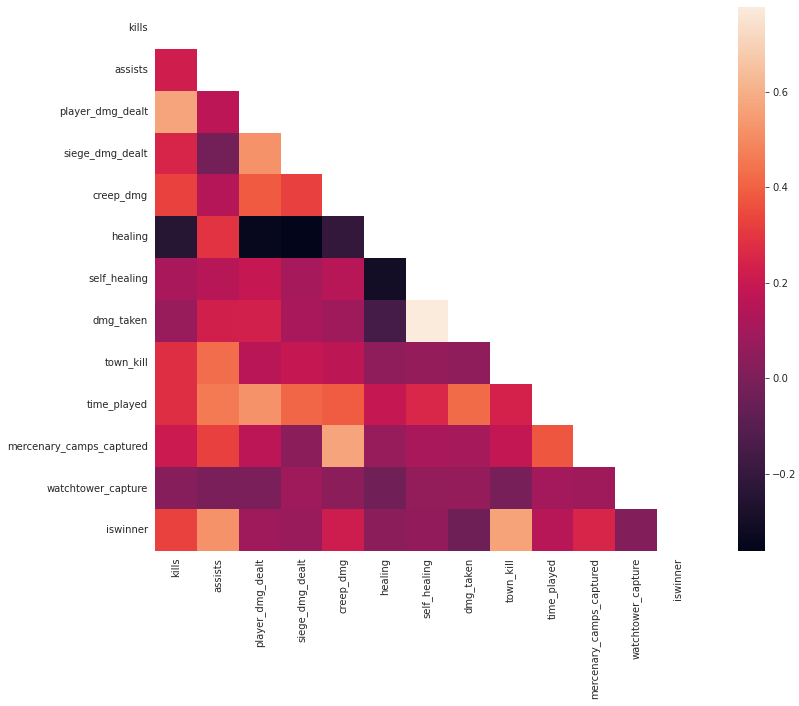

In [15]:
import seaborn as sns
# represent feature correlation matrix using a heatmap
corr = data_new[num].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, square=True)

In [ ]:
num2 = ['kills', 'assists', 'player_dmg_dealt', 'siege_dmg_dealt', 'creep_dmg', 'healing',
       'self_healing', 'dmg_taken', 'town_kill', 'time_played',
       'mercenary_camps_captured', 'watchtower_capture']
data_new[num2].hist(figsize=(21, 15))
plt.show()

## Data Preprocessing

In [ ]:
features = ['kills', 'assists', 'player_dmg_dealt', 'siege_dmg_dealt', 'creep_dmg', 
       'healing', 'self_healing', 'dmg_taken', 'town_kill', 'time_played', 
       'mercenary_camps_captured', 'watchtower_capture', 'mapid', 'characterid']

num = ['kills', 'assists', 'player_dmg_dealt', 'siege_dmg_dealt', 'creep_dmg', 
       'healing', 'self_healing', 'dmg_taken', 'town_kill', 'time_played',
      'mercenary_camps_captured', 'watchtower_capture']

cat = ['mapid', 'characterid']

target = ['iswinner']

In [ ]:
"""
Categorical features, characterid and mapid, have 90 and 13 categories
Binary encoding results in lower dimensionality that one-hot encoding
"""
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline([
    ('scaler', StandardScaler())])
cat_pipe = Pipeline([
    ('binaryencoder', BinaryEncoder(cols=[cat]))])
ct = ColumnTransformer([
    ('num', num_pipe, num),
    ('cat', BinaryEncoder(cols=cat), cat)])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new[features], data_new[target], test_size=0.2)
y_train_prep, y_test_prep = y_train.to_numpy(), y_test.to_numpy()

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24000, 14), (24000, 1), (6000, 14), (6000, 1))

In [21]:
from sklearn.decomposition import PCA
X_train_num = num_pipe.fit_transform(X_train[num])
pca = PCA(n_components=12)
pca.fit(X_train_num)
pca.explained_variance_ratio_

array([0.28773764, 0.15062757, 0.13291081, 0.09283879, 0.08217956,
       0.07364945, 0.06154622, 0.03459391, 0.0282845 , 0.02518459,
       0.01651155, 0.01393542])

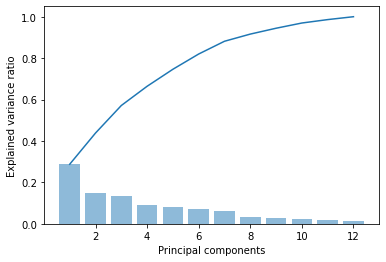

In [22]:
plt.bar(range(1, 13), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.plot(range(1, 13), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## Based on PCA analysis of numerical data, I chose not to perform dimensionality reduction
## The majority of features are needed to explain the variance of the data

In [23]:
x_train_prep = ct.fit_transform(X_train)
x_test_prep = ct.transform(X_test)
x_train_prep[:3]

array([[ 1.0392933 ,  0.17154695,  0.28011997, -0.04553551, -0.40991876,
        -0.46669449, -0.44170666, -0.81324479,  0.49107338, -0.98615046,
        -0.42229617, -0.41775827,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-1.1358769 ,  0.17154695, -1.07408259, -0.98328088, -0.67609915,
         1.42270235, -0.4319016 , -0.41606335, -1.01866351, -0.51708191,
         0.34198315, -0.41775827,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-0.41082017, -0.19412734, -0.2170249 , -0.58330293, -0.75415516,
         1.7074559 ,  0.53198448, -0.29580218, -0.26379507,  1.02352855,
         0.34198315, -0.41775827,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.    

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

param_grid = [{'max_iter':[100, 300, 500],'C':[0.001, 0.01, 0.1, 1, 10, 100], 
               'solver':['newton-cg', 'liblinear']}]

grid_search = GridSearchCV(lr, param_grid, cv=10, return_train_score=True)
grid_search.fit(x_train_prep, y_train_prep.ravel())
grid_search.best_params_

{'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}

In [25]:
lr_model_ind = LogisticRegression(C=.1, solver='newton-cg')

In [26]:
from sklearn.pipeline import make_pipeline

full_pipe = make_pipeline(ct, 
                         lr_model_ind)

In [27]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,random_state=None).split(X_train, y_train_prep)

scores = []
for k, (train_index, test_index) in enumerate(kfold):
    xk_train = X_train.iloc[train_index]
    xk_test = X_train.iloc[test_index]
    yk_train, yk_test = y_train_prep[train_index], y_train_prep[test_index]
    full_pipe.fit(xk_train, yk_train.ravel())
       
    score = full_pipe.score(xk_test, yk_test.ravel())
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train_prep[train_index].ravel()), score))
    print('CVaccuracy: %.3f +/-%.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [10778 10822], Acc: 0.831
CVaccuracy: 0.831 +/-0.000
Fold:  2, Class dist.: [10778 10822], Acc: 0.836
CVaccuracy: 0.834 +/-0.003
Fold:  3, Class dist.: [10778 10822], Acc: 0.858
CVaccuracy: 0.842 +/-0.011
Fold:  4, Class dist.: [10778 10822], Acc: 0.843
CVaccuracy: 0.842 +/-0.010
Fold:  5, Class dist.: [10778 10822], Acc: 0.842
CVaccuracy: 0.842 +/-0.009
Fold:  6, Class dist.: [10777 10823], Acc: 0.855
CVaccuracy: 0.844 +/-0.009
Fold:  7, Class dist.: [10777 10823], Acc: 0.830
CVaccuracy: 0.842 +/-0.010
Fold:  8, Class dist.: [10777 10823], Acc: 0.853
CVaccuracy: 0.843 +/-0.010
Fold:  9, Class dist.: [10777 10823], Acc: 0.854
CVaccuracy: 0.845 +/-0.010
Fold: 10, Class dist.: [10777 10823], Acc: 0.847
CVaccuracy: 0.845 +/-0.009


In [28]:
full_pipe.score(X_test, y_test_prep.ravel())

0.8453333333333334

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_prep.shape, x_test_prep.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000, 1), (6000, 1))

## Simple MLP for binary classifcation

In [30]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR')] 

In [31]:
tf.keras.backend.clear_session()

model = Sequential([
    Dense(60, activation='relu', input_dim=23),
    Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1440      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=METRICS)

In [33]:
model.fit(x_train_prep, y_train_prep, batch_size= 64, epochs=20, validation_split=0.1)

Epoch 1/20
338/338 [==============================] - 7s 13ms/step - loss: 0.3559 - tp: 9280.0000 - fp: 2012.0000 - tn: 8800.0000 - fn: 1508.0000 - accuracy: 0.8370 - precision: 0.8218 - recall: 0.8602 - auc: 0.9202 - prc: 0.9125 - val_loss: 0.3394 - val_tp: 1041.0000 - val_fp: 162.0000 - val_tn: 1001.0000 - val_fn: 196.0000 - val_accuracy: 0.8508 - val_precision: 0.8653 - val_recall: 0.8416 - val_auc: 0.9313 - val_prc: 0.9337
Epoch 2/20
338/338 [==============================] - 4s 11ms/step - loss: 0.3308 - tp: 9395.0000 - fp: 1868.0000 - tn: 8944.0000 - fn: 1393.0000 - accuracy: 0.8490 - precision: 0.8341 - recall: 0.8709 - auc: 0.9314 - prc: 0.9277 - val_loss: 0.3380 - val_tp: 1043.0000 - val_fp: 164.0000 - val_tn: 999.0000 - val_fn: 194.0000 - val_accuracy: 0.8508 - val_precision: 0.8641 - val_recall: 0.8432 - val_auc: 0.9326 - val_prc: 0.9359
Epoch 3/20
338/338 [==============================] - 4s 11ms/step - loss: 0.3250 - tp: 9471.0000 - fp: 1897.0000 - tn: 8915.0000 - fn: 131

In [34]:
model.evaluate(x_test_prep, y_test)

188/188 [==============================] - 2s 8ms/step - loss: 0.3362 - tp: 2588.0000 - fp: 494.0000 - tn: 2531.0000 - fn: 387.0000 - accuracy: 0.8532 - precision: 0.8397 - recall: 0.8699 - auc: 0.9314 - prc: 0.9288


[0.33617913722991943,
 2588.0,
 494.0,
 2531.0,
 387.0,
 0.8531666398048401,
 0.8397144675254822,
 0.8699159622192383,
 0.9313599467277527,
 0.928763747215271]

## Cross validation of MLP

In [35]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import keras

x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(data_new[features], data_new[target], test_size=0.15)
y_train_nn, y_test_nn = y_train_nn.to_numpy(), y_test_nn.to_numpy()
# precision-recall curve

def create_model():
    model = Sequential([
        Dense(60, activation='relu', input_dim=23),
        Dense(30, activation='relu'),
        Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
    return model

In [36]:
nn_pipe = Pipeline([('col_trans', ct),
                   ('mlp', KerasClassifier(build_fn=create_model, epochs=5, batch_size=128))])

kfoldnn = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(nn_pipe, x_train_nn, y_train_nn, cv=kfoldnn)
print(results)

Epoch 1/5


C:\Users\corey\AppData\Local\Temp/ipykernel_35516/2044742692.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  ('mlp', KerasClassifier(build_fn=create_model, epochs=5, batch_size=128))])


180/180 [==============================] - 4s 11ms/step - loss: 0.4104 - tp: 12130.0000 - fp: 2757.0000 - tn: 11758.0000 - fn: 2305.0000 - accuracy: 0.8251 - precision: 0.8148 - recall: 0.8403 - auc: 0.9035 - prc: 0.8959
Epoch 2/5
180/180 [==============================] - 2s 11ms/step - loss: 0.3399 - tp: 9939.0000 - fp: 2042.0000 - tn: 9448.0000 - fn: 1521.0000 - accuracy: 0.8447 - precision: 0.8296 - recall: 0.8673 - auc: 0.9277 - prc: 0.9222
Epoch 3/5
180/180 [==============================] - 2s 10ms/step - loss: 0.3322 - tp: 9965.0000 - fp: 1995.0000 - tn: 9495.0000 - fn: 1495.0000 - accuracy: 0.8479 - precision: 0.8332 - recall: 0.8695 - auc: 0.9307 - prc: 0.9268
Epoch 4/5
180/180 [==============================] - 2s 10ms/step - loss: 0.3287 - tp: 10044.0000 - fp: 1990.0000 - tn: 9500.0000 - fn: 1416.0000 - accuracy: 0.8516 - precision: 0.8346 - recall: 0.8764 - auc: 0.9322 - prc: 0.9288
Epoch 5/5
20/20 [==============================] - 1s 9ms/step - loss: 0.3182 - tp: 1126.00

In [37]:
x_test_nn_prep = ct.transform(x_test_nn)
model.evaluate(x_test_nn_prep, y_test_nn)

141/141 [==============================] - 1s 7ms/step - loss: 0.3000 - tp: 2011.0000 - fp: 343.0000 - tn: 1890.0000 - fn: 256.0000 - accuracy: 0.8669 - precision: 0.8543 - recall: 0.8871 - auc: 0.9437 - prc: 0.9423


[0.29998356103897095,
 2011.0,
 343.0,
 1890.0,
 256.0,
 0.8668888807296753,
 0.8542905449867249,
 0.8870754241943359,
 0.9437443017959595,
 0.9423220753669739]

## 2D Projection of data to demonstrate clustering

In [38]:
classes = data_new.merge(mapping, how='left')
classes = classes.drop(columns=['characterid', 'iswinner', 'mapid', 'watchtower_capture'])
classes = classes.sample(n=10000)
feats = ['kills', 'assists', 'player_dmg_dealt', 'siege_dmg_dealt', 
         'creep_dmg', 'healing', 'self_healing', 'dmg_taken', 'town_kill',
         'mercenary_camps_captured', 'time_played']
label = ['class']

In [39]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE

X_train_classes = num_pipe.fit_transform(classes[feats])
y_train_classes = classes[label].to_numpy()
n_samples, n_features = X_train_num.shape
n_neighbors = 30

In [40]:
X=X_train_classes.copy()
tsne = TSNE(n_components=2, init='pca', perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

C:\Users\corey\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\corey\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [41]:
X=X_train_classes.copy()
lle = LocallyLinearEmbedding(n_neighbors=5, method="standard")
lle_results= lle.fit_transform(X)

In [42]:
tsne_d = {'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1], 'classes':y_train_classes.ravel()}
lle_d = {'lle-2d-one':lle_results[:, 0], 'lle-2d-two':lle_results[:,1], 'classes':y_train_classes.ravel()}

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

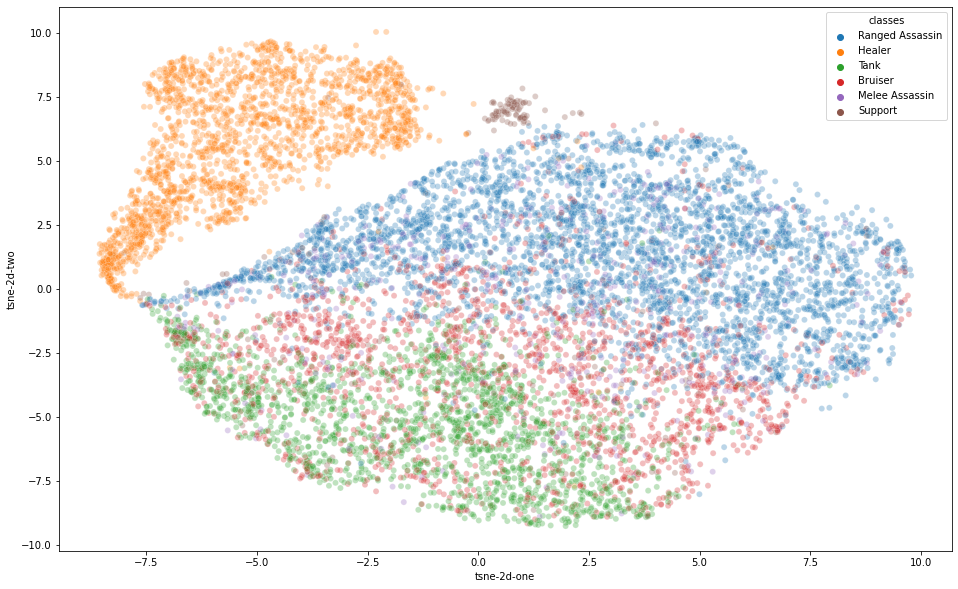

In [43]:
tsne_result = pd.DataFrame(data=tsne_d)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-2d-one', 
    y='tsne-2d-two',
    hue="classes",
    palette=sns.color_palette("tab10", 6),
    data=tsne_result,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='lle-2d-one', ylabel='lle-2d-two'>

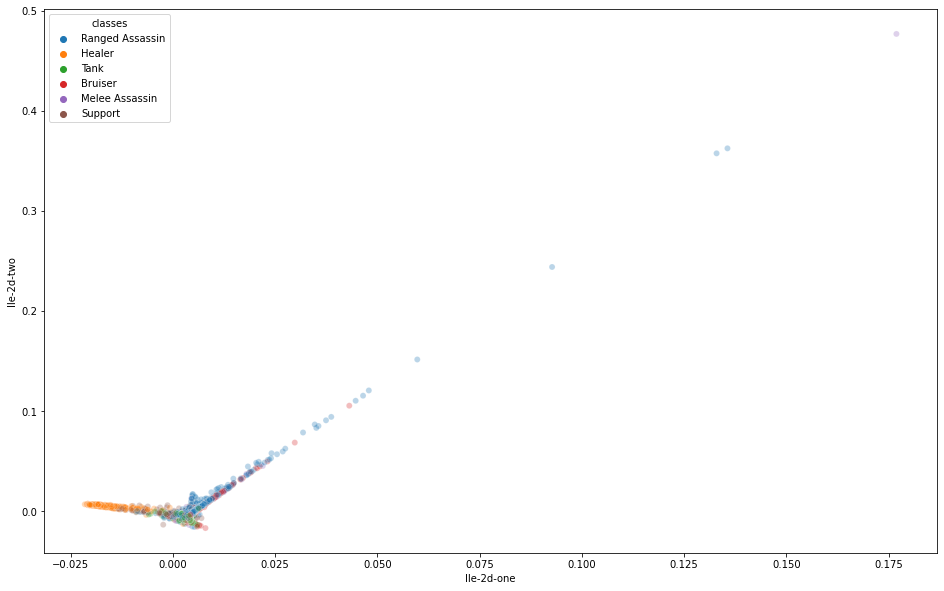

In [44]:
lle_result = pd.DataFrame(data=lle_d)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='lle-2d-one', 
    y='lle-2d-two',
    hue="classes",
    palette=sns.color_palette("tab10", 6),
    data=lle_result,
    legend="full",
    alpha=0.3
)

In [45]:
import datetime

In [46]:
ct2 = ColumnTransformer([
    ('cat', BinaryEncoder(cols=cat), cat)])

In [47]:
x_train_nn2, x_test_nn2, y_train_nn2, y_test_nn2 = train_test_split(data_new[features], data_new[target], test_size=0.15)
y_train_nn2, y_test_nn2 = y_train_nn2.to_numpy(), y_test_nn2.to_numpy()

In [49]:
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Input, BatchNormalization, Dense, Dropout

model3 = Sequential([
        Input(shape=(23,)),
        BatchNormalization(),
        Dense(30, activation='elu'),
        Dropout(rate=0.1),
        BatchNormalization(),
        Dense(10, activation='elu'),
        Dropout(rate=0.1),
        BatchNormalization(),
        Dense(1, activation='sigmoid')])

optimizer3 = tf.keras.optimizers.Adam(learning_rate = 0.1)
loss3 = tf.keras.losses.BinaryCrossentropy()
model3.compile(loss=loss3, optimizer=optimizer3, metrics=METRICS)

In [50]:
x_train_nn2_prep = ct.fit_transform(x_train_nn2)

In [51]:
model3.fit(x_train_nn2_prep, y_train_nn2, batch_size= 128, epochs=20, validation_split=0.01)

Epoch 1/20
198/198 [==============================] - 6s 21ms/step - loss: 0.3781 - tp: 12889.0000 - fp: 2890.0000 - tn: 11912.0000 - fn: 2054.0000 - accuracy: 0.8338 - precision: 0.8168 - recall: 0.8625 - auc: 0.9148 - prc: 0.9083 - val_loss: 0.4504 - val_tp: 100.0000 - val_fp: 17.0000 - val_tn: 106.0000 - val_fn: 32.0000 - val_accuracy: 0.8078 - val_precision: 0.8547 - val_recall: 0.7576 - val_auc: 0.9075 - val_prc: 0.9156
Epoch 2/20
198/198 [==============================] - 3s 16ms/step - loss: 0.3590 - tp: 10998.0000 - fp: 2425.0000 - tn: 10144.0000 - fn: 1678.0000 - accuracy: 0.8375 - precision: 0.8193 - recall: 0.8676 - auc: 0.9193 - prc: 0.9147 - val_loss: 0.6786 - val_tp: 81.0000 - val_fp: 11.0000 - val_tn: 112.0000 - val_fn: 51.0000 - val_accuracy: 0.7569 - val_precision: 0.8804 - val_recall: 0.6136 - val_auc: 0.8866 - val_prc: 0.8958
Epoch 3/20
198/198 [==============================] - 3s 16ms/step - loss: 0.3528 - tp: 11006.0000 - fp: 2327.0000 - tn: 10242.0000 - fn: 1670.

In [52]:
x_test_nn2_prep = ct.transform(x_test_nn2)

In [53]:
model3.evaluate(x_test_nn2_prep, y_test_nn2)

141/141 [==============================] - 1s 7ms/step - loss: 0.3378 - tp: 1900.0000 - fp: 399.0000 - tn: 1909.0000 - fn: 292.0000 - accuracy: 0.8464 - precision: 0.8264 - recall: 0.8668 - auc: 0.9307 - prc: 0.9271


[0.33781152963638306,
 1900.0,
 399.0,
 1909.0,
 292.0,
 0.8464444279670715,
 0.8264462947845459,
 0.8667883276939392,
 0.9307277202606201,
 0.9270804524421692]